In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_bordeaux_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Bordeaux')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/bordeaux_{date}.csv',index=False)
get_listings_bordeaux_timeseries()

In [4]:
# pull in detailed_listings
raw_df_bordeaux = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_bordeaux)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(bordeaux_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 9424 AirBnb listings.


In [5]:
bordeaux_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2020-12.csv')
bordeaux_raw_df_12_12_2020.shape





(10562, 16)

In [6]:
# use magic commands 'cd' to change directory
# use glob to locate all files for bordeaux
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_bordeaux = glob.glob('bordeaux/**.csv')
files_bordeaux

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['bordeaux/Bordeaux_2021-08.csv',
 'bordeaux/Bordeaux_2021-09.csv',
 'bordeaux/Bordeaux_2020-12.csv',
 'bordeaux/Bordeaux_2021-10.csv',
 'bordeaux/Bordeaux_2021-04.csv',
 'bordeaux/Bordeaux_2021-07.csv',
 'bordeaux/Bordeaux_2021-06.csv',
 'bordeaux/Bordeaux_2021-02.csv',
 'bordeaux/Bordeaux_2021-03.csv',
 'bordeaux/Bordeaux_2021-01.csv']

In [7]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

bordeaux_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(bordeaux_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_12_12_2020['price'].mean(),2)}.")

bordeaux_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(bordeaux_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_1_9_2021['price'].mean(),2)}.")

bordeaux_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(bordeaux_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_2_8_2021['price'].mean(),2)}.")

bordeaux_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(bordeaux_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_3_4_2021['price'].mean(),2)}.")

bordeaux_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(bordeaux_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_4_9_2021['price'].mean(),2)}.")

#bordeaux_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(bordeaux_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_5_19_2021['price'].mean(),2)}.")

bordeaux_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(bordeaux_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_6_3_2021['price'].mean(),2)}.")

bordeaux_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(bordeaux_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_7_4_2021['price'].mean(),2)}.")

bordeaux_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(bordeaux_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_8_6_2021['price'].mean(),2)}.")

bordeaux_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(bordeaux_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_9_7_2021['price'].mean(),2)}.")

bordeaux_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(bordeaux_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_10_6_2021['price'].mean(),2)}.")

#bordeaux_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(bordeaux_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 10562 AirBnb listings; the avg price is €89.18.
The 1_9_2021 dataset contains 10615 AirBnb listings; the avg price is €87.85.
The 2_8_2021 dataset contains 10590 AirBnb listings; the avg price is €89.51.
The 3_4_2021 dataset contains 10466 AirBnb listings; the avg price is €89.95.
The 4_9_2021 dataset contains 10567 AirBnb listings; the avg price is €91.56.
The 6_3_2021 dataset contains 10496 AirBnb listings; the avg price is €94.35.
The 7_4_2021 dataset contains 10616 AirBnb listings; the avg price is €95.36.
The 8_6_2021 dataset contains 9663 AirBnb listings; the avg price is €98.91.
The 9_7_2021 dataset contains 9440 AirBnb listings; the avg price is €96.77.
The 10_6_2021 dataset contains 9424 AirBnb listings; the avg price is €96.95.


In [8]:
df_list_bordeaux = [bordeaux_raw_df_12_12_2020, bordeaux_raw_df_1_9_2021, bordeaux_raw_df_2_8_2021,
           bordeaux_raw_df_3_4_2021, bordeaux_raw_df_4_9_2021, bordeaux_raw_df_6_3_2021, bordeaux_raw_df_7_4_2021,
           bordeaux_raw_df_8_6_2021, bordeaux_raw_df_9_7_2021, bordeaux_raw_df_10_6_2021]

dates_bordeaux = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_bordeaux = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_bordeaux = []

def airbnb_parse_bordeaux(df_list, files):
    for file in files_bordeaux:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_{file}.csv")
        print(f"The {file} bordeaux dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_bordeaux(df_list, dates):
    for file in files_bordeaux:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_bordeaux.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_bordeaux)

bordeaux_parse = airbnb_parse_bordeaux(df_list_bordeaux, files_bordeaux)


The 2020-12 bordeaux dataset contains 10562 AirBnb listings -- the avg price is €89.18.
The 2021-01 bordeaux dataset contains 10615 AirBnb listings -- the avg price is €87.85.
The 2021-02 bordeaux dataset contains 10590 AirBnb listings -- the avg price is €89.51.
The 2021-03 bordeaux dataset contains 10466 AirBnb listings -- the avg price is €89.95.
The 2021-04 bordeaux dataset contains 10567 AirBnb listings -- the avg price is €91.56.
The 2021-06 bordeaux dataset contains 10496 AirBnb listings -- the avg price is €94.35.
The 2021-07 bordeaux dataset contains 10616 AirBnb listings -- the avg price is €95.36.
The 2021-08 bordeaux dataset contains 9663 AirBnb listings -- the avg price is €98.91.
The 2021-09 bordeaux dataset contains 9440 AirBnb listings -- the avg price is €96.77.
The 2021-10 bordeaux dataset contains 9424 AirBnb listings -- the avg price is €96.95.


In [9]:
bordeaux_summary = airbnb_to_frame_bordeaux(df_list_bordeaux, files_bordeaux)
bordeaux_summary['Date of scrape'] = pd.to_datetime(bordeaux_summary['Date of scrape'])
bordeaux_summary['City'] = 'bordeaux'
bordeaux_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,10562,89.18,63.0,0,8890,0.90,bordeaux
1,2021-01-01,10615,87.85,60.0,0,8890,0.88,bordeaux
2,2021-02-01,10590,89.51,61.0,0,8890,0.86,bordeaux
3,2021-03-01,10466,89.95,61.0,0,8890,0.87,bordeaux
4,2021-04-01,10567,91.56,62.0,0,8890,0.86,bordeaux
5,2021-06-01,10496,94.35,65.0,0,8890,0.89,bordeaux
6,2021-07-01,10616,95.36,65.0,0,8890,0.92,bordeaux
7,2021-08-01,9663,98.91,69.0,0,8890,1.08,bordeaux
8,2021-09-01,9440,96.77,67.0,0,8890,1.13,bordeaux
9,2021-10-01,9424,96.95,68.0,0,8890,1.11,bordeaux


In [10]:
master_df_bordeaux = pd.concat(df_list_bordeaux)
master_df_bordeaux_unique = master_df_bordeaux.drop_duplicates(subset='id')
master_df_bordeaux_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,28925,Grande maison centre ville Comme à la campagne,124398,Laurence,Bordeaux,Centre ville (Bordeaux),44.84910,-0.59350,Entire home/apt,350,2,2,2018-07-06,0.05,1,179,NaN,NaN
1,185534,L'Echoppe typique de Bordeaux - tout confort,890736,Aurore,Bordeaux,Saint Augustin - Tauzin - Alphonse Dupeux,44.83063,-0.59331,Entire home/apt,115,3,0,NaN,NaN,1,0,NaN,NaN
2,218103,B&B Apart.Suite / tropical garden,1127981,Luis,Bgles,Bgles,44.81418,-0.54842,Entire home/apt,110,2,39,2020-09-13,0.35,4,3,NaN,NaN
3,222887,"Bordeaux Terrace - spectacular view, fast Wifi",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.83611,-0.56640,Entire home/apt,157,3,38,2019-11-11,0.35,4,259,NaN,NaN
4,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.84782,-0.58105,Entire home/apt,124,3,24,2020-03-08,0.31,4,316,NaN,NaN


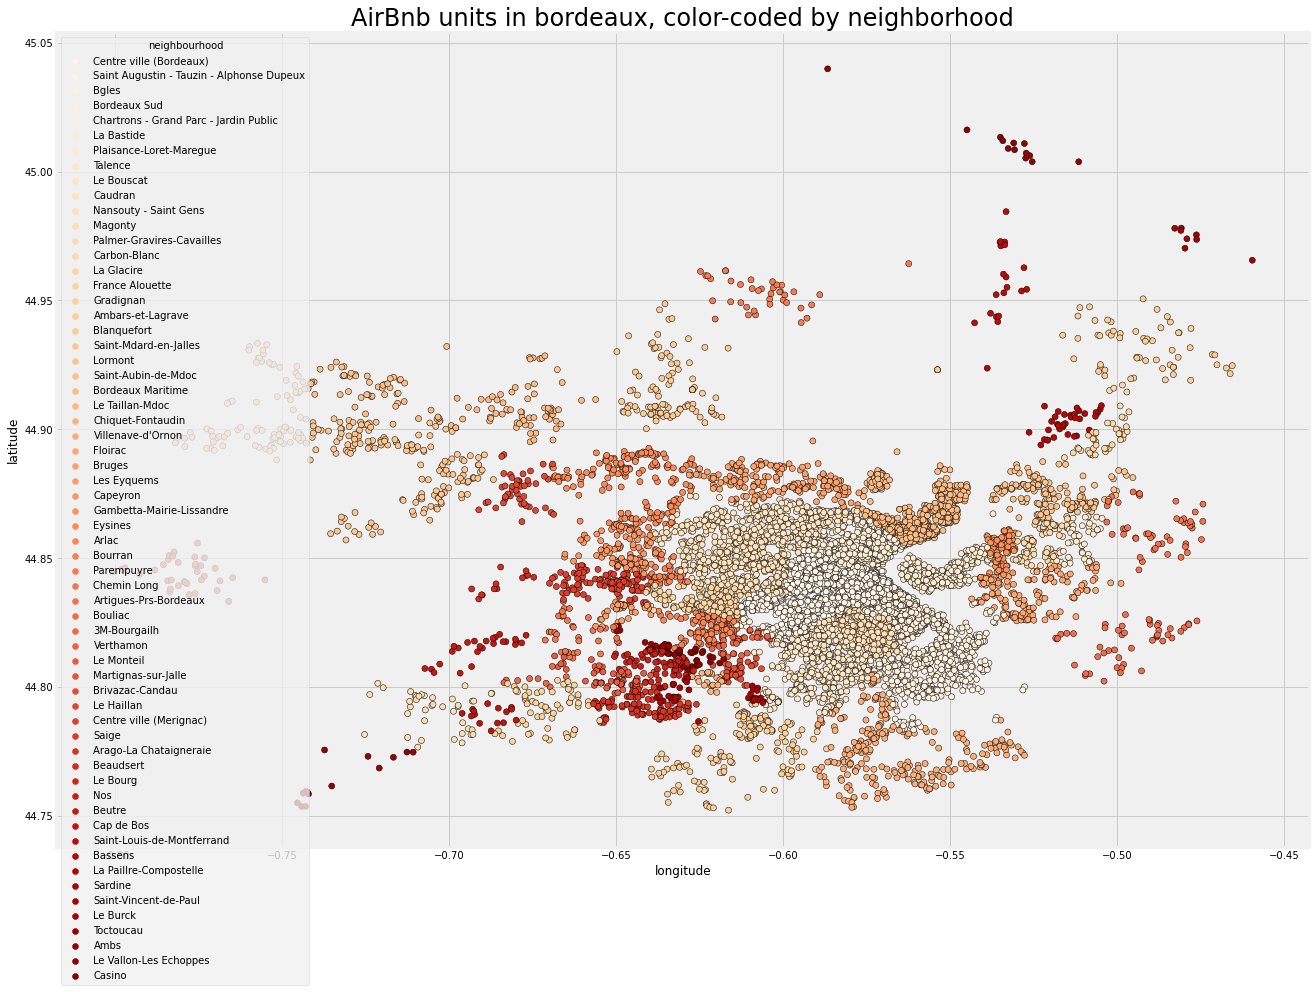

In [11]:
title = 'AirBnb units in bordeaux, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_bordeaux_unique.longitude, master_df_bordeaux_unique.latitude, hue = master_df_bordeaux_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_bordeaux.png')
plt.show()

## Add review data through a join

In [12]:
df_reviews = pd.concat([bordeaux_raw_df_10_6_2021,raw_df_bordeaux],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,28925,Grande maison centre ville Comme à la campagne,124398,Laurence,Bordeaux,Centre ville (Bordeaux),44.850240,-0.592090,Entire home/apt,255,...,5.00,4.50,5.00,5.00,5.00,4.50,f,1,0,0
1,218103,B&B Apart.Suite / tropical garden,1127981,Luis,Bgles,Bgles,44.815450,-0.548080,Entire home/apt,110,...,4.75,4.74,4.92,4.96,4.58,4.55,f,4,0,0
2,222887,"Bordeaux Terrace - spectacular view, fast Wifi",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.836110,-0.566400,Entire home/apt,158,...,4.67,4.47,4.88,4.95,4.71,4.49,t,4,0,0
3,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.847820,-0.581050,Entire home/apt,162,...,4.96,4.68,4.96,4.93,4.89,4.59,t,4,0,0
4,317658,"Key to Bordeaux - fairytale view, 2 bd + elevator",1156398,Suzanna,Bordeaux,Centre ville (Bordeaux),44.838820,-0.568870,Entire home/apt,200,...,4.73,4.77,4.90,4.84,4.97,4.65,t,4,0,0
5,333031,STUDIO BORDEAUX TRIANGLE D OR ***** Climatisé,1697156,Antony,Bordeaux,Centre ville (Bordeaux),44.842560,-0.577940,Entire home/apt,79,...,4.94,4.95,4.94,4.91,4.98,4.81,f,1,1,0
6,333592,Charming apt with terrace center town,1699300,Alexandre,Bordeaux,Centre ville (Bordeaux),44.845830,-0.583060,Entire home/apt,101,...,4.87,4.38,4.85,4.87,4.79,4.56,f,1,0,0
7,365993,Modern&comfortable 3 rooms apart,1847986,Damien,Bgles,Bgles,44.811490,-0.558250,Entire home/apt,85,...,4.90,4.98,4.88,4.90,4.63,4.65,f,2,0,0
8,408270,B&B Bedroom N°2 / tropical garden,1127981,Luis,Bgles,Bgles,44.815620,-0.547870,Entire home/apt,90,...,4.80,4.64,4.85,4.88,4.56,4.60,f,4,0,0
9,410267,B&B Apart. N°3 / Tropical Garden,1127981,Luis,Bgles,Bgles,44.814430,-0.548760,Entire home/apt,90,...,4.88,4.82,4.95,4.96,4.73,4.72,f,4,0,0


## Regression

In [13]:
#df_reviews_.columns

In [14]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [15]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  1.434664834526444
Coefficients:  [ 16.91275505  40.40165123  -6.16431669   0.41035235   1.58016665
  -3.27340552  -4.12556261  23.97526667 -24.11643271]
LinearRegression()


In [16]:
y_pred2 = regr.predict(X_)

In [17]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
1086,389,85.137830,-303.862170
1335,400,110.846074,-289.153926
2005,350,64.280106,-285.719894
8642,400,131.714244,-268.285756
5500,328,64.522873,-263.477127


<function matplotlib.pyplot.ylim(*args, **kwargs)>

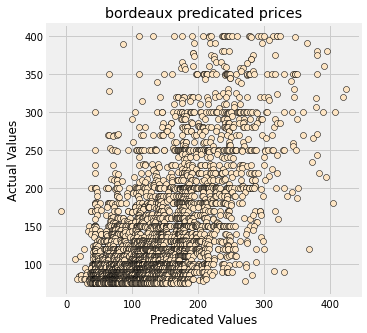

In [18]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicated Values')
plt.ylabel('Actual Values')
plt.title('bordeaux predicated prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim